In [9]:
import tensorflow as tf
import numpy as np
import random as rd
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt
import time
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Activation, Dense, Dropout
from keras.optimizers import SGD

%matplotlib inline

In [10]:
image = np.loadtxt('bbs-train.txt')
label = np.loadtxt('label-train.txt')
image /= np.max(image)

In [11]:
# initialize the dataset
d = 4200
image_train = image[:d]
image_val = image[d:]
t = label[0:,1:]
t_x = np.reshape(t, (1,4546))
labels = np_utils.to_categorical(t_x, 2)
label_train = labels[:d]
label_val = labels[d:]

In [17]:
def DefineModel():
    # hidden layers
    # one lay
    first_layer_width = 500
    second_layer_width = 500
    third_layer_width = 500
    
    # activation function
    activation_func = 'relu' 
    
    # loss function either categorical_crossentropy or mean_squared_error
    loss_function = 'categorical_crossentropy'
    
    
    learning_rate = 0.1
    
    # initialize the model
    model= Sequential()
    
    ## First hidden layer with 'first_layer_width' neurons. 
    ## Also need to specify input dimension.
    ## 'Dense' means fully-connected.
    model.add(Dense(first_layer_width, input_dim=800))
    model.add(Activation(activation_func))
    model.add(Dropout(0.5))
    
    if second_layer_width > 0:
        model.add(Dense(second_layer_width))
        model.add(Activation(activation_func))
        model.add(Dropout(0.1))
        
    if third_layer_width > 0:
        model.add(Dense(third_layer_width))
        model.add(Activation(activation_func))
        model.add(Dropout(0.1))
        
    ## Last layer has the same dimension as the number of classes
    model.add(Dense(2))
    ## For classification, the activation is softmax
    model.add(Activation('softmax'))
    ## Define optimizer. Here, we select SGD.
    opt = SGD(lr=learning_rate, clipnorm=5.)
    model.compile(loss = loss_function, optimizer=opt, metrics=["accuracy"])
    
    return model

In [18]:
def TrainModel(data=None, epochs=20):
    batch=1024
    start_time = time.time()
    model = DefineModel()
    x_train, x_val, y_train, y_val = data
    print('Start training.')

    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch,
            validation_data=(x_val, y_val))
    print("Training took {0} seconds.".format(time.time() - start_time))
    return model, history

In [19]:
trained_model, training_history = TrainModel(data=[image_train, image_val, label_train, label_val])

Start training.
Train on 4200 samples, validate on 346 samples
Epoch 1/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6781 - acc: 0.6083 - val_loss: 0.5881 - val_acc: 0.8555
Epoch 2/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6453 - acc: 0.6640 - val_loss: 0.5508 - val_acc: 0.8555
Epoch 3/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6367 - acc: 0.6631 - val_loss: 0.5335 - val_acc: 0.8584
Epoch 4/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6325 - acc: 0.6643 - val_loss: 0.5140 - val_acc: 0.8584
Epoch 5/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6297 - acc: 0.6638 - val_loss: 0.5218 - val_acc: 0.8584
Epoch 6/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6289 - acc: 0.6655 - val_loss: 0.5023 - val_acc: 0.8584
Epoch 7/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6273 - acc: 0.6655 - val_loss: 0.4974 - val_acc: 0.8584
Epoch 8/20

4200/420

4200/4200 [==============================] - ETA: 0s - loss: 0.6184 - acc: 0.6745 - val_loss: 0.4719 - val_acc: 0.8584
Epoch 19/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6175 - acc: 0.6748 - val_loss: 0.4621 - val_acc: 0.8584
Epoch 20/20

4200/4200 [==============================] - ETA: 0s - loss: 0.6181 - acc: 0.6738 - val_loss: 0.4728 - val_acc: 0.8584
Training took 21.162031412124634 seconds.


In [20]:
def PlotHistory(train_value, test_value, value_is_loss_or_acc):
    f, ax = plt.subplots()
    ax.plot([None] + train_value, 'o-')
    ax.plot([None] + test_value, 'x-')
    ## Plot legend and use the best location automatically: loc = 0.
    ax.legend(['Train ' + value_is_loss_or_acc, 'Validation ' + value_is_loss_or_acc], loc = 0) 
    ax.set_title('Training/Validation ' + value_is_loss_or_acc + ' per Epoch')
    ax.set_xlabel('Epoch')
    ax.set_ylabel(value_is_loss_or_acc)  
 

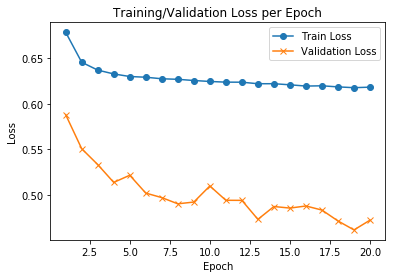

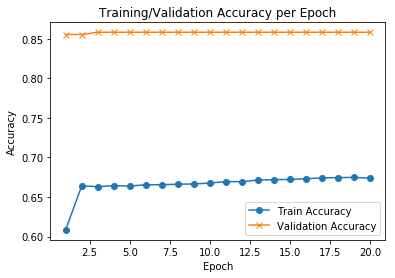

In [21]:
PlotHistory(training_history.history['loss'], training_history.history['val_loss'], 'Loss')
PlotHistory(training_history.history['acc'], training_history.history['val_acc'], 'Accuracy')